In [1]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA # faz o PCA
from sklearn import preprocessing # para centralizar os dados e manter a proporção entre as dimensões
import matplotlib.pyplot as plt # para gerar os graficos

#import matplotlib.axes.Axes.set_aspect

In [2]:
# Gerando dados Aleatorios
dimensoes = ['dimensao' + str(i) for i in range(1,3)]
print(dimensoes)

['dimensao1', 'dimensao2']


In [3]:
amostrasT = ['T-' + str(i) for i in range(1,7)]
#amostrasK = ['K-' + str(i) for i in range(1,7)]
#amostrasG = ['G-' + str(i) for i in range(1,7)]
print(amostrasT)
#print(amostrasK)
#print(amostrasG)

['T-1', 'T-2', 'T-3', 'T-4', 'T-5', 'T-6']


In [4]:
#df = pd.DataFrame(columns=[*amostrasT, *amostrasK, *amostrasG], index=dimensoes)
df = pd.DataFrame(columns=[*amostrasT], index=dimensoes)
df

,T-1,T-2,T-3,T-4,T-5,T-6
dimensao1,NaN,NaN,NaN,NaN,NaN,NaN
dimensao2,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data = np.array([
[10,11,8,3,2,  1],#trocado      1,2

[6, 4, 5,3,1,2.8]
])

In [6]:
'''data = np.array([
[1 , 2,3, 4,5, 6],#trocado      1,2    X

[1+0 , 2,3, 4,5, 6+3] #                    Y
])'''

'data = np.array([\n[1 , 2,3, 4,5, 6],#trocado      1,2    X\n\n[1+0 , 2,3, 4,5, 6+3] #                    Y\n])'

In [7]:
i = 0
for dimensao in df.index: #para cada dimensão do meu data frame
    df.loc[dimensao,'T-1':'T-6'] = data[i]
    i = i+1
    
    #df.loc[dimensao,'T-1':'T-6'] = np.random.poisson(lam=rd.randrange(1,1000), size=6)# valores com uma distribuição de poisson com a media aleatoria entre 1 e 100
    #df.loc[dimensao,'K-1':'K-6'] = np.random.poisson(lam=rd.randrange(1,1000), size=6)# valores com uma distribuição de poisson com a media aleatoria entre 1 e 100
    #df.loc[dimensao,'G-1':'G-6'] = np.random.poisson(lam=rd.randrange(1,1000), size=6)# valores com uma distribuição de poisson com a media aleatoria entre 1 e 100

In [8]:
#df = pd.read_csv("iris-Copy1.csv")
#df = df.drop(columns=['variety'])
df

,T-1,T-2,T-3,T-4,T-5,T-6
dimensao1,10,11,8,3,2,1
dimensao2,6,4,5,3,1,2.8


In [9]:
# PCA

scaled_data = preprocessing.scale(X=df.T, with_mean=True, with_std=False) # centraliza os dados na origem e normaliza(media = 0 e desvio padrão = 1) 
# transposto porque os porque a função scale recebe as amostras como linhas e as dimesões como colunas

#scaled_data = StandartScaler().fit_transform(df.T)


scaled_data.T# dados escalados são 18 [] um por amostra e [12 valores(um por dimensão)] 

array([[ 4.16666667,  5.16666667,  2.16666667, -2.83333333, -3.83333333,
        -4.83333333],
       [ 2.36666667,  0.36666667,  1.36666667, -0.63333333, -2.63333333,
        -0.83333333]])

In [10]:
pca = PCA()
pca.fit(scaled_data) # magic

PCA()

In [11]:
pca_data = pca.transform(scaled_data) # coordenadas dos dados nas PC's

#[] = uma amostra ()
#são 18 [] com [12 valores] o numero maximo de pc's gerados é a dimensionalidade dados ou quantidade de amostras-1 (o que for menor)
#porque? se vc tiver mais dimesões que amostras-1, as PC's depois de amostra-1 vão ser sempre zero
# 2 pontos = reta = pc1 logo variancia em pc2 é sempre 0 / 3 pontos = plano = pc1 + pc2 logo variancia em pc3 é sempre 0
#logo os dados neste caso terão 12 dimensões
''''

4.7199359  
4.98900588 
2.50010857 
2.88129103 
3.89030345 
5.43745584

'''
pca_data

array([[ 4.70803928, -0.89251797],
       [ 5.00775127,  1.32337299],
       [ 2.49214833, -0.59280598],
       [-2.88593236, -0.31667539],
       [-4.47881793,  1.25262877],
       [-4.8431886 , -0.77400243]])

In [12]:
coe = pca.components_
pca.components_

array([[ 0.94629878,  0.3232934 ],
       [ 0.3232934 , -0.94629878]])

In [13]:
#print(coe[1][0]/coe[0][0])

#(coe[0][1]/coe[0][0])

print(coe[0][1])
print(coe[0][0])

print(coe[0][1]/coe[0][0])

0.3232933952419959
0.9462987797693192
0.34163987331866336


In [14]:
print('PC1 - {}'.format(np.round(coe[0][1]/coe[0][0], decimals=2) ) )
print('PC2 - {}'.format(np.round(coe[1][1]/coe[1][0], decimals=2) ) )

PC1 - 0.34
PC2 - -2.93


In [15]:
print('PC1 - x {}  +  y {}'.format(np.round(coe[0][0], decimals=2), np.round(coe[0][1], decimals=2) ) )
print('PC2 - x {}  +  y {}'.format(np.round(coe[1][0], decimals=2), np.round(coe[1][1], decimals=2) ) )

PC1 - x 0.95  +  y 0.32
PC2 - x 0.32  +  y -0.95


In [16]:
#labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
pca_df = pd.DataFrame(pca.components_, index=['PC1', 'PC2'], columns=['X', 'Y'])
pca_df

,X,Y
PC1,0.946299,0.323293
PC2,0.323293,-0.946299


In [17]:
np.round(pca_data, decimals=2)

array([[ 4.71, -0.89],
       [ 5.01,  1.32],
       [ 2.49, -0.59],
       [-2.89, -0.32],
       [-4.48,  1.25],
       [-4.84, -0.77]])

In [18]:
# PCA plot
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)#quanta imformação cada pc tem em %, o ultimo é zero pq ne (não sei pq ele entra)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]# labels para o grafico
print(per_var)
print(labels)

[95.3  4.7]
['PC1', 'PC2']


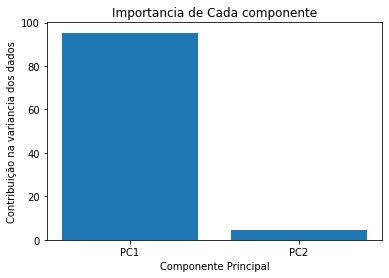

In [19]:
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)#grafico de barras
plt.ylabel('Contribuição na variancia dos dados')
plt.xlabel('Componente Principal')
plt.title('Importancia de Cada componente')
plt.show()
# com PC1 e PC2 temos mais de 90% da variancia dos dados

In [20]:
#dados nas PC's
#pca_df = pd.DataFrame(pca_data, index=[*amostrasT, *amostrasK, *amostrasG], columns=labels)
pca_df = pd.DataFrame(pca_data, index=[*amostrasT], columns=labels)
np.round(pca_df, decimals=2)

,PC1,PC2
T-1,4.71,-0.89
T-2,5.01,1.32
T-3,2.49,-0.59
T-4,-2.89,-0.32
T-5,-4.48,1.25
T-6,-4.84,-0.77


In [21]:
df1 = df.T
np.round(df1, decimals=2)

,dimensao1,dimensao2
T-1,10,6
T-2,11,4
T-3,8,5
T-4,3,3
T-5,2,1
T-6,1,2.8


In [22]:
m1 = np.mean(df1.dimensao1)
print(m1)

m2 = np.mean(df1.dimensao2)

print(m2)

5.833333333333333
3.6333333333333333


In [23]:
scaled_data

array([[ 4.16666667,  2.36666667],
       [ 5.16666667,  0.36666667],
       [ 2.16666667,  1.36666667],
       [-2.83333333, -0.63333333],
       [-3.83333333, -2.63333333],
       [-4.83333333, -0.83333333]])

In [24]:
m1 = np.mean(df1.dimensao1)
#print(np.mean(pca_df.PC1)

m2 = np.mean(df1.dimensao2)

#print(np.mean(pca_df.PC2)

#df1.dimensao1-m1

In [25]:
#df1.dimensao2-m2

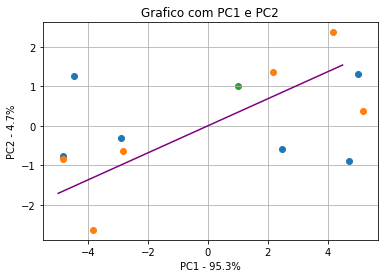

In [26]:
plt.scatter(np.round(pca_df.PC1, decimals=2), np.round(pca_df.PC2, decimals=2))

#plt.scatter(df1.dimensao1 , df1.dimensao2, color = 'red')

plt.scatter(df1.dimensao1 -m1 , df1.dimensao2 -m2)

plt.scatter(1, 1)

x = np.arange(-5, 5, 0.5)

plt.plot(x, x * (coe[0][1]/coe[0][0]), color = 'purple')

#plt.plot(x, x * (coe[1][1]/coe[1][0]), color = 'green')


plt.title('Grafico com PC1 e PC2')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
plt.grid(True)

#for sample in pca_df.index:
    #plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
    #print(sample)
    #print(pca_df.PC1.loc[sample])
    #print(pca_df.PC2.loc[sample])
    #print('\n')

plt.show()

In [27]:
'''plt.scatter(np.round(df.PC1, decimals=2), np.round(df.PC2, decimals=2))
plt.title('Grafico com PC1 e PC2')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
plt.grid(True)

for sample in pca_df.index:
    plt.annotate(sample, (-pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
plt.show()'''

"plt.scatter(np.round(df.PC1, decimals=2), np.round(df.PC2, decimals=2))\nplt.title('Grafico com PC1 e PC2')\nplt.xlabel('PC1 - {0}%'.format(per_var[0]))\nplt.ylabel('PC2 - {0}%'.format(per_var[1]))\nplt.grid(True)\n\nfor sample in pca_df.index:\n    plt.annotate(sample, (-pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))\nplt.show()"

In [28]:
'''dimensoes = ['dimensao' + str(i) for i in range(1,5)]

amostrasT = ['amostras' + str(i) for i in range(1,7)]

df = pd.DataFrame(columns=[*amostrasT], index=dimensoes)

i = 1

for dimensao in df.index: #para cada dimensão do meu data frame
    df.loc[dimensao,'T-1'] = np.array(1,2,3,7,7,8)
    i = 0
df'''

"dimensoes = ['dimensao' + str(i) for i in range(1,5)]\n\namostrasT = ['amostras' + str(i) for i in range(1,7)]\n\ndf = pd.DataFrame(columns=[*amostrasT], index=dimensoes)\n\ni = 1\n\nfor dimensao in df.index: #para cada dimensão do meu data frame\n    df.loc[dimensao,'T-1'] = np.array(1,2,3,7,7,8)\n    i = 0\ndf"

In [29]:
pca_df = pd.DataFrame(pca_data, index=[*amostrasT], columns=labels)
pca_df

,PC1,PC2
T-1,4.708039,-0.892518
T-2,5.007751,1.323373
T-3,2.492148,-0.592806
T-4,-2.885932,-0.316675
T-5,-4.478818,1.252629
T-6,-4.843189,-0.774002


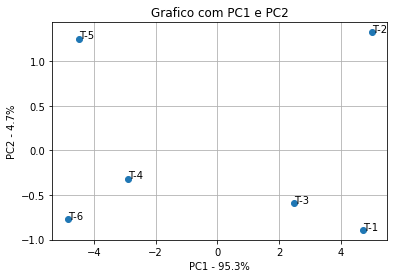

In [30]:
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('Grafico com PC1 e PC2')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
plt.grid(True)
 
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
 
plt.show()

In [31]:
print(pca.explained_variance_ratio_)

[0.95321878 0.04678122]


In [32]:
print(np.round(pca.explained_variance_ratio_* 100, decimals=1))

[95.3  4.7]


In [33]:
print(np.round(pca.components_ * 10, decimals=1))

[[ 9.5  3.2]
 [ 3.2 -9.5]]


In [34]:
pca.components_

array([[ 0.94629878,  0.3232934 ],
       [ 0.3232934 , -0.94629878]])

In [35]:
print(np.round(pca.explained_variance_, decimals=1))

[21.1  1. ]


In [36]:
print(np.round(pca.explained_variance_ratio_, decimals=1))

[1. 0.]


In [37]:
print(np.round(pca.singular_values_, decimals=1))

[10.3  2.3]


In [38]:
print(np.round(pca.mean_, decimals=1))

[ 0. -0.]


In [39]:
print(np.round(pca.n_components_, decimals=1))

2


In [40]:
print(np.round(pca.n_features_, decimals=1))

2


In [41]:
print(np.round(pca.n_samples_, decimals=1))

6


In [42]:
print(np.round(pca.noise_variance_, decimals=1))

0.0


In [43]:
print(np.round(pca.noise_variance_, decimals=1))

0.0


In [44]:
print(3.6+5+3.1+0.25+0.45+5.5)

17.9


In [45]:
print(3.25+5.6+2.2+1.45+2.01+3.35)

17.86
